In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Tweets.csv


In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
#import tweepy as tw #for accessing Twitter API


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

In [66]:
# Load Tweet dataset-------------twitter-and-reddit-sentimental-analysis-dataset
df = pd.read_csv('/kaggle/input/Tweets.csv')
# Output first five rows
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [67]:
# Check for missing data
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [68]:
# dimensionality of the data
df.shape

(14640, 15)

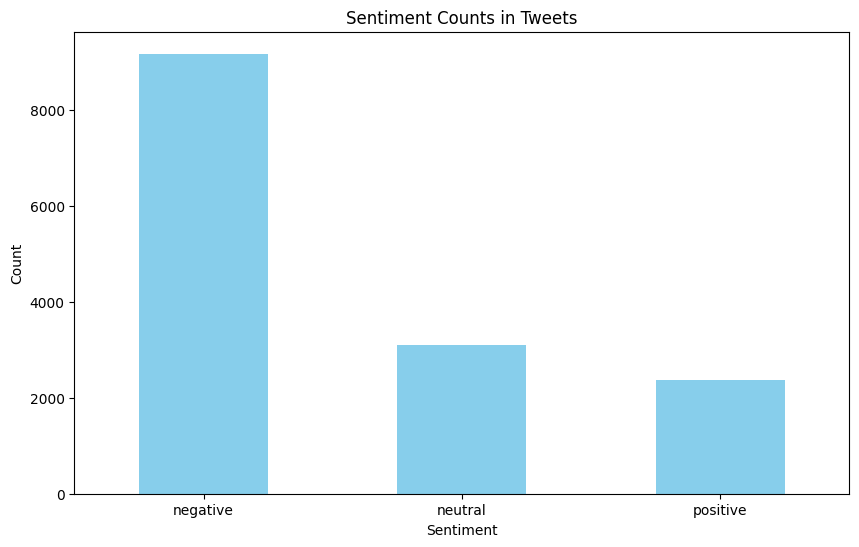

In [69]:
# Set the Pandas plotting backend to matplotlib
pd.options.plotting.backend = "matplotlib"

# Assuming df is your DataFrame with the airline sentiment data
sentiment_counts = df['airline_sentiment'].value_counts()

# Plotting the bar graph with matplotlib
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Counts in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the sentiment labels horizontal
plt.show()


In [70]:
import plotly.express as px
fig = px.pie(df, names='airline_sentiment', title ='Pie chart of different sentiments of tweets')
fig.show()

<Axes: >

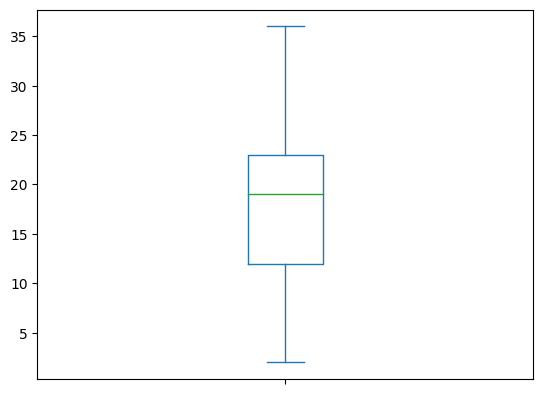

In [71]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df['text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

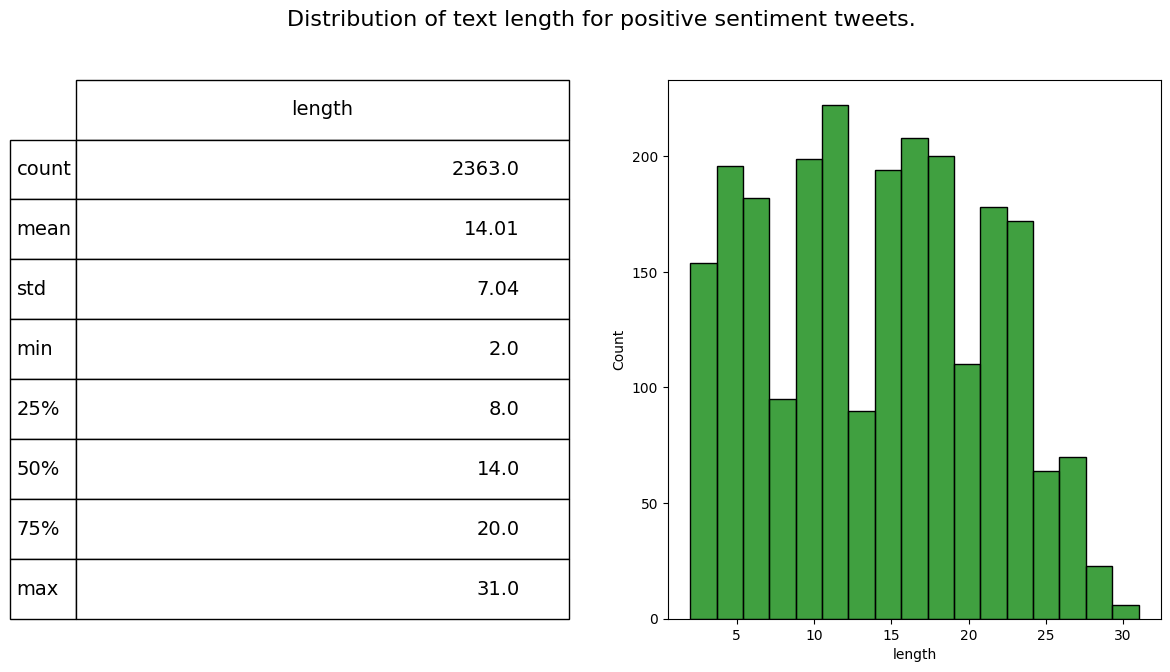

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column to the DataFrame that contains the length of each tweet
df['length'] = df['text'].str.split().apply(len)

# Set up the matplotlib figure
fig = plt.figure(figsize=(14,7))

# Add a subplot for the histogram
ax1 = fig.add_subplot(122)

# Plot a histogram of the lengths of tweets with positive sentiment
sns.histplot(df[df['airline_sentiment'] == 'positive']['length'], ax=ax1, color='green')

# Compute descriptive statistics for the lengths of tweets with positive sentiment
describe = df['length'][df['airline_sentiment'] == 'positive'].describe().to_frame().round(2)

# Add a subplot for the table of descriptive statistics
ax2 = fig.add_subplot(121)

# Hide the axes of the subplot for the table
ax2.axis('off')

# Set font size for the table
font_size = 14

# Set the bounding box for the table
bbox = [0, 0, 1, 1]

# Create the table and set its font size
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)

# Set the title for the figure
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

# Show the plot
plt.show()


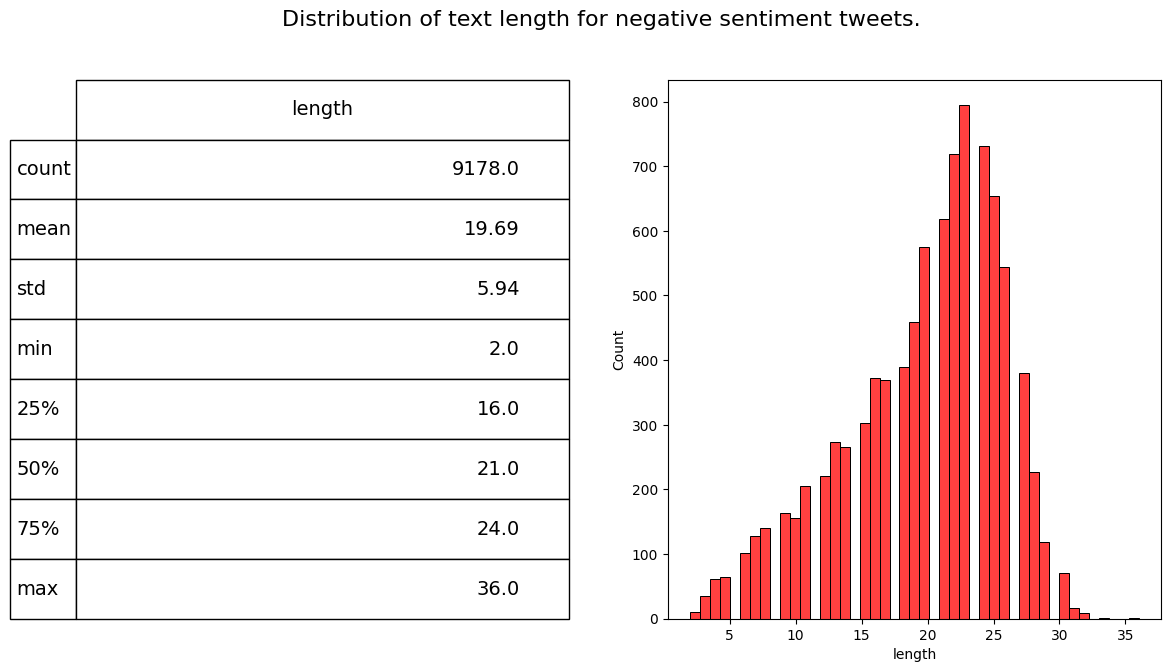

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the length of each tweet and add it as a new column
df['length'] = df['text'].str.split().apply(len)

# Set up the figure for plotting
fig = plt.figure(figsize=(14,7))

# Add a subplot for the histogram on the right side (1 row, 2 columns, 2nd subplot)
ax1 = fig.add_subplot(122)

# Plot the histogram of lengths for tweets with negative sentiment
sns.histplot(df[df['airline_sentiment'] == 'negative']['length'], ax=ax1, color='red')

# Compute and round the descriptive statistics for negative sentiment tweets' lengths
describe = df['length'][df['airline_sentiment'] == 'negative'].describe().to_frame().round(2)

# Add a subplot for the table of descriptive statistics on the left side (1st subplot)
ax2 = fig.add_subplot(121)

# Turn off the axis for the table subplot
ax2.axis('off')

# Define the font size for the table
font_size = 14

# Set the bounding box for the table within the subplot
bbox = [0, 0, 1, 1]

# Create the table with the descriptive statistics
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)

# Set the font size of the table
table.set_fontsize(font_size)

# Set the overall title for the figure
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

# Display the plot
plt.show()


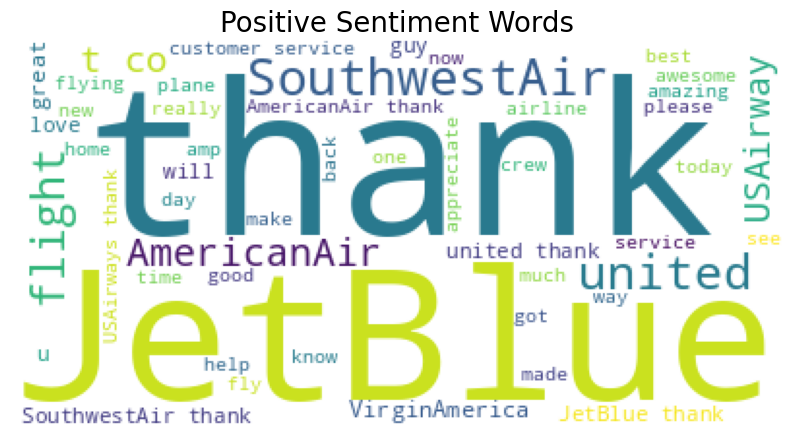

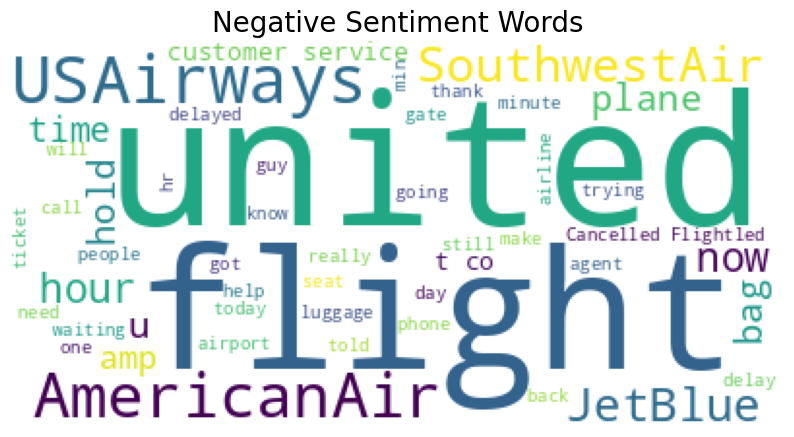

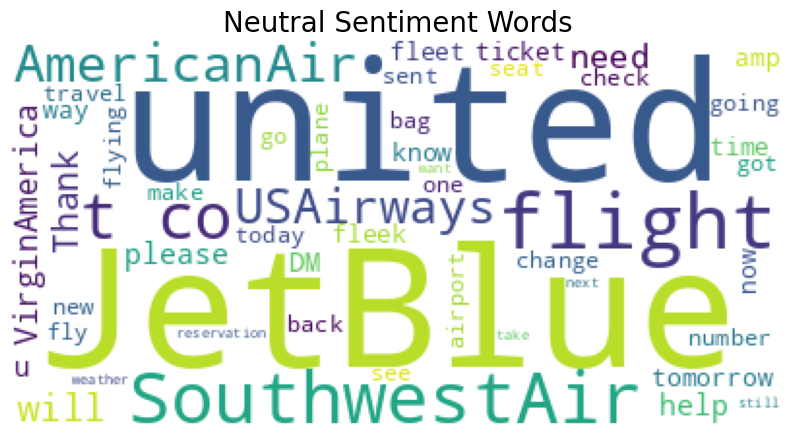

In [74]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to generate word clouds for given sentiment
def wordcount_gen(df, sentiment):
    # Combine all tweets of the given sentiment
    combined_tweets = " ".join(tweet for tweet in df[df['airline_sentiment'] == sentiment]['text'])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white', max_words=50, stopwords=STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title(f'{sentiment.capitalize()} Sentiment Words', fontsize=20)
    plt.axis('off')  # Hide the axis
    plt.show()

# Assuming 'df' is your DataFrame and it's already been loaded
# Generate and plot word clouds for each sentiment
wordcount_gen(df, 'positive')
wordcount_gen(df, 'negative')
wordcount_gen(df, 'neutral')


In [75]:
import re
from nltk.stem import PorterStemmer

# Predefined set of stopwords
stopwords = set(['the', 'and', 'is', 'in', 'to', 'that', 'it', 'for', 'on', 'with', 'as', 'this', 'by', 'was', 'are', 'at', 'be', 'have', 'from', 'but', 'they', 'not', 'or', 'an', 'all', 'their', 'has', 'you', 'were', 'one', 'had', 'your', 'which', 'will', 'can', 'we', 'its', 'if', 'do', 'also', 'my', 'me', 'no', 'he', 'so', 'there', 'when', 'would', 'more', 'who', 'about', 'like', 'over', 'than', 'how', 'out', 'her', 'them', 'she', 'some', 'other', 'these', 'his', 'may', 'what', 'because', 'any', 'our', 'us', 'most', 'such'])

# Assuming 'df' is your DataFrame and 'text' is the column with the tweet texts
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # Convert to lowercase
    text = tweet.lower()
    # Remove non-letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # Tokenize
    words = text.split()
    # Remove stopwords
    words = [w for w in words if w not in stopwords]
    # Apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # Return list
    return words

# Process the first tweet in the dataframe
print("\nOriginal tweet ->", df['text'][10])
print("\nProcessed tweet ->", tweet_to_words(df['text'][10]))



Original tweet -> @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24

Processed tweet -> ['virginamerica', 'did', 'know', 'suicid', 'second', 'lead', 'caus', 'of', 'death', 'among', 'teen', '10', '24']


In [76]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, df['text']))

In [77]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['airline_sentiment'])

In [78]:
print(X[10])
print(Y[10])

['virginamerica', 'did', 'know', 'suicid', 'second', 'lead', 'caus', 'of', 'death', 'among', 'teen', '10', '24']
1


In [79]:
y = pd.get_dummies(df['airline_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary_size = 5000

# Initialize CountVectorizer with an empty token_pattern
count_vector = CountVectorizer(max_features=vocabulary_size,
                               preprocessor=lambda x: x,
                               tokenizer=lambda x: x,
                               lowercase=False,
                               token_pattern='')

# Fit and transform the training data
X_train_transformed = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test_transformed = count_vector.transform(X_test).toarray()

# Print the first 200 words/tokens
feature_names = count_vector.get_feature_names_out()
print(feature_names[:200])

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



['0' '00' '000' '0016' '00pm' '02' '03' '05' '05am' '05pm' '1' '10' '100'
 '1000' '1007' '105' '1051' '1080' '1081' '1099' '10am' '10min' '10p'
 '10pm' '11' '110' '1106' '1142' '117' '1181' '11am' '11th' '12' '120'
 '1200' '122' '1230' '1242' '125' '13' '130' '1357' '1359' '136' '1389'
 '13th' '14' '140' '1472' '1491' '15' '150' '1514' '152' '1531' '1533'
 '1547' '15min' '15minut' '15th' '16' '1600' '1625' '1627' '1679' '1687'
 '17' '1700' '1701' '1706' '174' '1750' '18' '180' '1800' '1808' '1843'
 '1861' '19' '1917' '1951' '1am' '1hr' '1k' '1m' '1pm' '1st' '2' '20'
 '200' '2000' '200er' '2012' '2014' '2015' '2016' '202' '2034' '20min'
 '21' '21st' '22' '23' '2324' '236' '24' '2401' '2470' '249' '24h' '24hr'
 '24th' '25' '250' '2586' '25min' '26' '26th' '27' '28' '28th' '29' '2955'
 '2d' '2day' '2hour' '2hr' '2min' '2nd' '2pm' '2x' '2y' '3' '30' '300'
 '3001885409' '3040' '3056' '30am' '30min' '30pm' '30th' '31' '32' '33'
 '330' '34' '35' '350' '35x' '36' '3659' '37' '38' '386' '39' '3

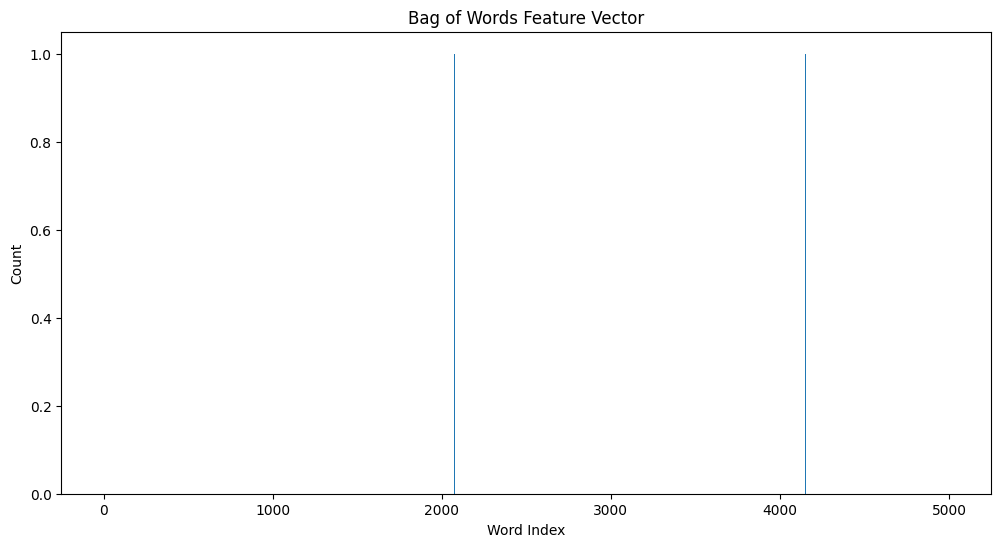

In [81]:
import matplotlib.pyplot as plt

# Select the sample you want to visualize (e.g., the third sample)
sample_index = 2  # Adjust this index to choose a different sample

# Get the BoW feature vector for the selected sample
bow_feature_vector = X_train_transformed[sample_index]

# Create a plot for the BoW feature vector
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(range(len(bow_feature_vector)), bow_feature_vector)
plt.xlabel('Word Index')
plt.ylabel('Count')
plt.title('Bag of Words Feature Vector')
plt.show()


In [82]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 50

# Replace 'your_text_data' with your actual data
# Assuming your text data is stored in the 'clean_text' column of a DataFrame
your_text_data = df['text'].tolist()

def tokenize_pad_sequences(text):
    '''
    This function tokenizes the input text into sequences of integers and then
    pads each sequence to the same length.
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # Return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', your_text_data[0])
X, tokenizer = tokenize_pad_sequences(your_text_data)
print('After Tokenization & Padding \n', X[0])


Before Tokenization & Padding 
 @VirginAmerica What @dhepburn said.
After Tokenization & Padding 
 [ 81  62 226   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [83]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [84]:
y = pd.get_dummies(df['airline_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (8784, 50) (8784, 3)
Validation Set -> (2928, 50) (2928, 3)
Test Set -> (2928, 50) (2928, 3)


In [85]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [86]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

vocab_size = 5000
embedding_size = 32
max_len = 50  # Ensure that 'max_len' is defined according to your sequence length
epochs = 50

# Build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

# Using the Adam optimizer with a custom learning rate
adam = Adam(learning_rate=0.001)


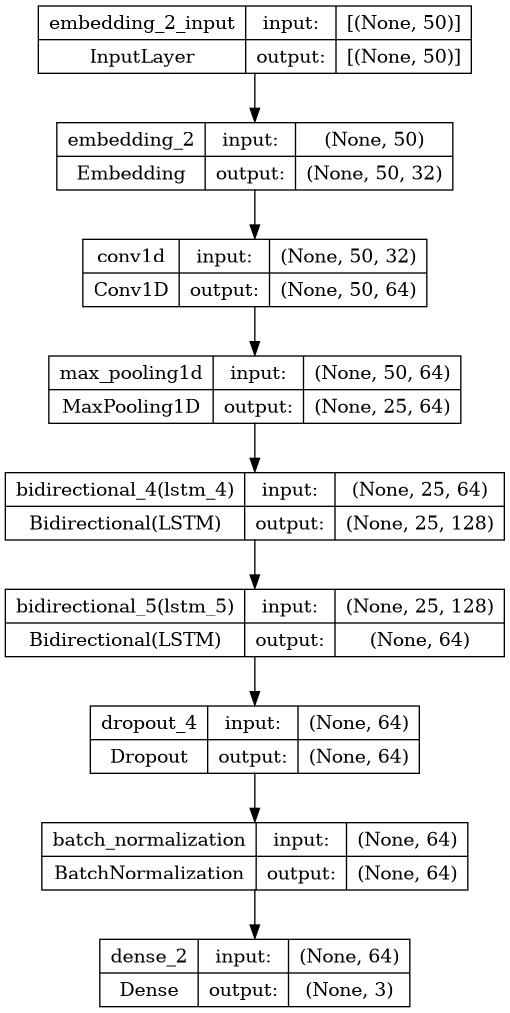

In [87]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [88]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=adam, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            6208      
                                                                 
 max_pooling1d (MaxPooling1  (None, 25, 64)            0         
 D)                                                              
                                                                 
 bidirectional_4 (Bidirecti  (None, 25, 128)           66048     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                      

In [89]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7691
Precision : 0.7711
Recall    : 0.7674
F1 Score  : 0.7693


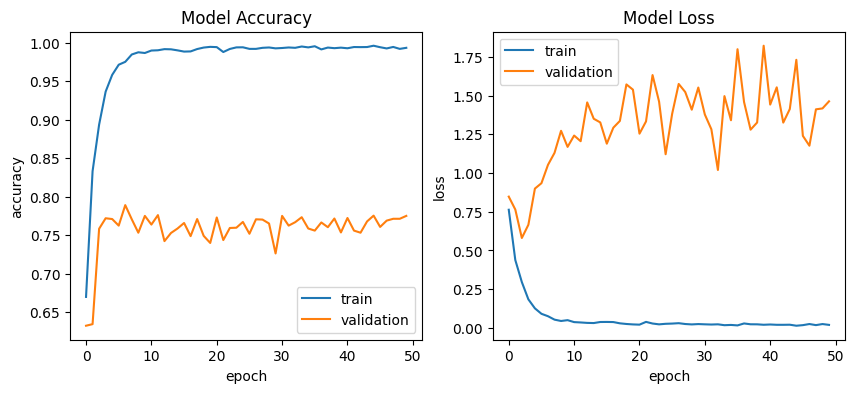

In [90]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

92/92 [==============================] - 3s 12ms/step


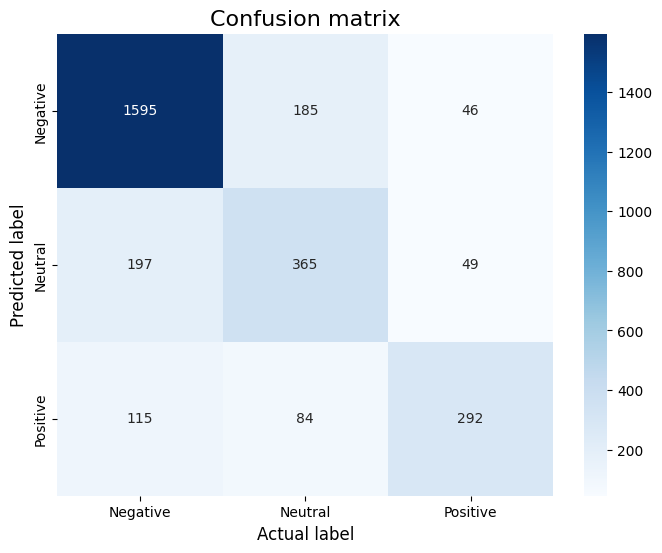

In [91]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [92]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [93]:
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [95]:
predict_class(['"The flying experience is good'])

1/1 [==============================] - 0s 31ms/step
The predicted sentiment is Positive
